In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file1 = "C:/Users/jegan/Downloads/Unemployment in India.xlsx"
file2 = "C:/Users/jegan/Downloads/Unemployment_Rate_upto_11_2020.xlsx"

In [4]:
data1 = pd.read_excel(file1, sheet_name=0)
data2 = pd.read_excel(file2, sheet_name=0)

print("Dataset 1:")
print(data1.head())
print("\nDataset 2:")
print(data2.head())
print("\nMissing values in Dataset 1:\n", data1.isnull().sum())
print("\nMissing values in Dataset 2:\n", data2.isnull().sum())


Dataset 1:
           Region        Date Frequency  Estimated Unemployment Rate (%)  \
0  Andhra Pradesh  31-05-2019   Monthly                             3.65   
1  Andhra Pradesh  30-06-2019   Monthly                             3.05   
2  Andhra Pradesh  31-07-2019   Monthly                             3.75   
3  Andhra Pradesh  31-08-2019   Monthly                             3.32   
4  Andhra Pradesh  30-09-2019   Monthly                             5.17   

   Estimated Employed  Estimated Labour Participation Rate (%)   Area  
0          11999139.0                                    43.24  Rural  
1          11755881.0                                    42.05  Rural  
2          12086707.0                                    43.50  Rural  
3          12285693.0                                    43.97  Rural  
4          12256762.0                                    44.68  Rural  

Dataset 2:
           Region        Date Frequency  Estimated Unemployment Rate (%)  \
0  Andhra Pr

In [5]:
data1.fillna(data1.median(), inplace=True)
data2.fillna(data2.median(), inplace=True)

C:\Users\jegan\AppData\Local\Temp\ipykernel_11588\3166165574.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data1.fillna(data1.median(), inplace=True)
C:\Users\jegan\AppData\Local\Temp\ipykernel_11588\3166165574.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data2.fillna(data2.median(), inplace=True)


In [6]:
merged_data = pd.merge(data1, data2, how='outer', on=['Date', 'Region'], suffixes=('_1', '_2'))
print("\nMerged Dataset:")
print(merged_data.head())


Merged Dataset:
           Region        Date Frequency_1  Estimated Unemployment Rate (%)_1  \
0  Andhra Pradesh  31-05-2019     Monthly                               3.65   
1  Andhra Pradesh  31-05-2019     Monthly                               6.09   
2  Andhra Pradesh  30-06-2019     Monthly                               3.05   
3  Andhra Pradesh  30-06-2019     Monthly                               3.80   
4  Andhra Pradesh  31-07-2019     Monthly                               3.75   

   Estimated Employed_1  Estimated Labour Participation Rate (%)_1   Area  \
0            11999139.0                                      43.24  Rural   
1             4788661.0                                      37.45  Urban   
2            11755881.0                                      42.05  Rural   
3             4824630.0                                      36.76  Urban   
4            12086707.0                                      43.50  Rural   

  Frequency_2  Estimated Unemployment R

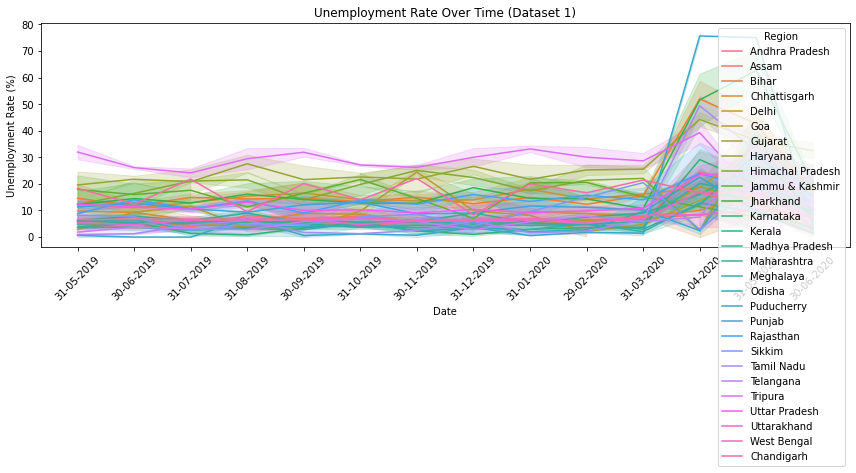

In [7]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data1, x='Date', y='Estimated Unemployment Rate (%)', hue='Region')
plt.title('Unemployment Rate Over Time (Dataset 1)')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

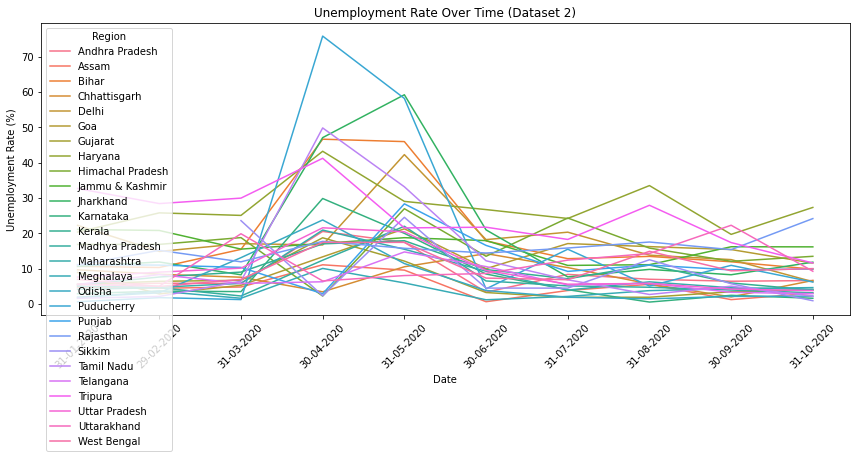

In [8]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data2, x='Date', y='Estimated Unemployment Rate (%)', hue='Region')
plt.title('Unemployment Rate Over Time (Dataset 2)')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

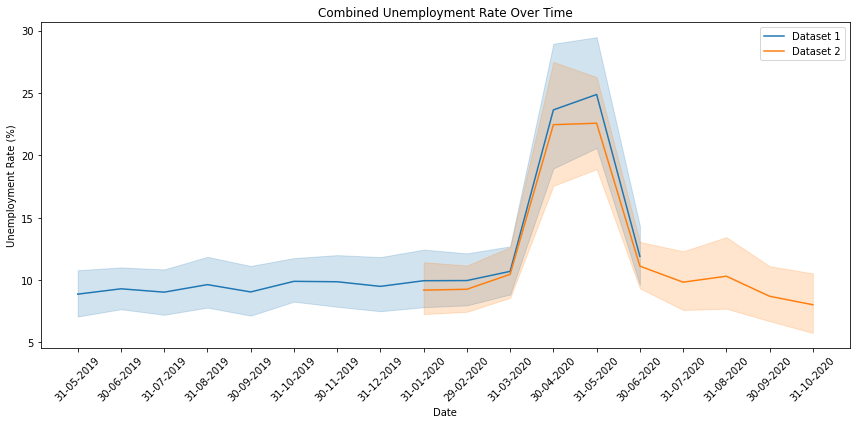

In [9]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_data, x='Date', y='Estimated Unemployment Rate (%)_1', label='Dataset 1')
sns.lineplot(data=merged_data, x='Date', y='Estimated Unemployment Rate (%)_2', label='Dataset 2')
plt.title('Combined Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
